### EFFECTIVENESS ANALYSIS OF CAPE-BASED INVESTMENT STRATEGY

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tabulate import tabulate

import statsmodels.api as sm
from scipy.stats import norm

## 1. Data Preprocessing

### 1.1. Data Import and Transformation

In [2]:
# import data
col_names = ['Date', 'S&PCompositePrice', 'Dividend', 'Earnings',
             'CPI', 'DateFraction', 'LongInterestRateGS10', 'RealPrice',
             'RealDividend', 'RealTotalReturnPrice', 'RealEarnings', 'RealTRScaledEarnings',
             'CAPE', 'NA1', 'TRCAPE', 'NA2',
             'ExcessCAPEYield', 'MonthlyTotalBondReturns', 'RealTotalBondReturns', '10YearAnnualizedStockRealReturn',
             '10YearAnnualizedBondsRealReturn', '10YearExcessAnnualizedReturns']
data = pd.read_excel(io='data/ie_data.xls', sheet_name='Data',
                     header=None, names=col_names,
                     index_col=None, skiprows=8, nrows=1842)
# data transformation
data.drop(['NA1', 'NA2'], axis=1, inplace=True)
data = data.round(4)
# set index as date
data['Date'] = pd.to_datetime(data['Date'].apply('{:.2f}'.format), format='%Y.%m')
data.set_index('Date', inplace=True)
data

,S&PCompositePrice,Dividend,Earnings,CPI,DateFraction,LongInterestRateGS10,RealPrice,RealDividend,RealTotalReturnPrice,RealEarnings,RealTRScaledEarnings,CAPE,TRCAPE,ExcessCAPEYield,MonthlyTotalBondReturns,RealTotalBondReturns,10YearAnnualizedStockRealReturn,10YearAnnualizedBondsRealReturn,10YearExcessAnnualizedReturns
Date,,,,,,,,,,,,,,,,,,,
1871-01-01,4.4400,0.2600,0.4000,12.4641,1871.0417,5.3200,112.0183,6.5596,1.120183e+02,10.0917,10.0917,NaN,NaN,NaN,1.0042,1.0000,0.1306,0.0925,0.0381
1871-02-01,4.5000,0.2600,0.4000,12.8446,1871.1250,5.3233,110.1681,6.3653,1.106986e+02,9.7927,9.8399,NaN,NaN,NaN,1.0042,0.9744,0.1309,0.0946,0.0362
1871-03-01,4.6100,0.2600,0.4000,13.0350,1871.2083,5.3267,111.2132,6.2723,1.122739e+02,9.6497,9.7418,NaN,NaN,NaN,1.0042,0.9642,0.1310,0.0962,0.0348
1871-04-01,4.7400,0.2600,0.4000,12.5592,1871.2917,5.3300,118.6809,6.5099,1.203605e+02,10.0153,10.1570,NaN,NaN,NaN,1.0042,1.0049,0.1221,0.0910,0.0311
1871-05-01,4.8600,0.2600,0.4000,12.2738,1871.3750,5.3333,124.5152,6.6613,1.268403e+02,10.2482,10.4395,NaN,NaN,NaN,1.0042,1.0326,0.1226,0.0895,0.0331
1871-06-01,4.8200,0.2600,0.4000,12.0835,1871.4583,5.3367,125.4355,6.7662,1.283521e+02,10.4096,10.6516,NaN,NaN,NaN,1.0042,1.0532,0.1231,0.0877,0.0354
1871-07-01,4.7300,0.2600,0.4000,12.0835,1871.5417,5.3400,123.0933,6.7662,1.265325e+02,10.4096,10.7004,NaN,NaN,NaN,1.0042,1.0577,0.1200,0.0866,0.0334
1871-08-01,4.7900,0.2600,0.4000,11.8932,1871.6250,5.3433,126.6488,6.8745,1.307762e+02,10.5761,10.9208,NaN,NaN,NaN,1.0042,1.0791,0.1119,0.0827,0.0293
1871-09-01,4.8400,0.2600,0.4000,12.1786,1871.7083,5.3467,124.9717,6.7134,1.296221e+02,10.3282,10.7126,NaN,NaN,NaN,1.0042,1.0582,0.1100,0.0810,0.0290


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1842 entries, 1871-01-01 to 2024-06-01
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   S&PCompositePrice                1842 non-null   float64
 1   Dividend                         1839 non-null   float64
 2   Earnings                         1839 non-null   float64
 3   CPI                              1842 non-null   float64
 4   DateFraction                     1842 non-null   float64
 5   LongInterestRateGS10             1842 non-null   float64
 6   RealPrice                        1842 non-null   float64
 7   RealDividend                     1839 non-null   float64
 8   RealTotalReturnPrice             1842 non-null   float64
 9   RealEarnings                     1839 non-null   float64
 10  RealTRScaledEarnings             1839 non-null   float64
 11  CAPE                             1722 non-null   float64
 12  TR

### 1.2. Column Description

Reference: http://www.econ.yale.edu/~shiller/data.htm
- **S&PCompositePrice**: S&P Composite Stock Price Index, monthly averages of daily closing prices
- **Dividend**: monthly dividends data are computed from the S&P four-quarter totals for the quarter since 1926, with linear interpolation to monthly figures; data before 1926 are from Cowles and associates, iterpolated from annual data
- **Earnings**: monthly earnings data are computed from the S&P four-quarter totals for the quarter since 1926, with linear interpolation to monthly figures; data before 1926 are from Cowles and associates, iterpolated from annual data
- **CPI**: CPI-U (Consumer Price Index - All Urban Consumers) published by the U.S. Bureau of Labor Statistics begins in 1913; for years before 1913, spliced to the CPI Warren and Pearson's price index, by multiplying it by the ratio of the indexes in January 1913; December 1999 and January 2000 values for the CPI-U are extrapolated
- DateFraction: month fraction equals [(-1 + month * 2) /24]
- **LongInterestRateGS10**: market yield on U.S. Treasury Securities at 10-year constant maturity
- ***RealPrice***: [*S&PCompositePrice* / *CPI-current* * *CPI*-202406] (inflation benchmark: latest CPI)
- **RealDividend**: [*Dividend* / *CPI-current* * *CPI-202406*]
- ***RealTotalReturnPrice***: [*RealTotalReturnPrice-last month* *((*RealPrice*+(*RealDividend*/12))/*RealPrice-last month*)]
- ***RealEarnings***: [*Earnings* / *CPI-current* * *CPI-202406*]
- RealTRScaledEarnings: [*RealEarnings* *(*RealTotalReturnPrice*/*RealPrice*)]
- **CAPE**: **Cyclically Adjusted Price Earnings Ratio P/E 10**, [*RealPrice* / AVERAGE(*RealEarnings-last 10 years*)] (**last 10 years**)
- TRCAPE: [*RealTotalReturnPrice* / AVERAGE(*RealTRScaledEarnings-last 10 years*)]
- ExcessCAPEYield: [1/*CAPE* - (*LongInterestRateGS10*/100-(((*CPI-current*/*CPI-10 years ago*)^(1/10))-1))] (E/P earnings return - real bond return)
- **MonthlyTotalBondReturns**: [(*GS10-current*/*GS10-next month*+*GS10-current*/1200+((1+*GS10-next month*/1200)^(-119))*(1-*GS10-current*/*GS10-next month*))]
- ***RealTotalBondReturns***: [*RealTotalBondReturns-last month* * *MonthlyTotalBondReturns-last month*/*CPI-current* * *CPI-last month*]  (inflation benchmark: initial CPI; at price level)
- **10YearAnnualizedStockRealReturn**: [(*RealTotalReturnPrice-10 years later*/*RealTotalReturnPrice*)^(1/10)-1]
- **10YearAnnualizedBondsRealReturn**: [(*RealTotalBondReturns-10 years later*/*RealTotalBondReturns*)^(1/10)-1]
- **10YearExcessAnnualizedReturns**: [*10YearAnnualizedStockRealReturn*-*10YearAnnualizedBondsRealReturn*] (**next 10 years**, investable)

### 1.3. Get Training Data

In [4]:
# note that the first 10(or 5) years and last 10(or 5) years might be removed after the metrics calculation
cols = ['RealPrice', 'RealEarnings', 'RealTotalReturnPrice', 'RealTotalBondReturns']
data_train = data.loc['1871-01': '2023-12', cols].copy()
print('training: ', len(data_train))

training:  1836


## 2. Signal Research

### 2.1. Initial Example

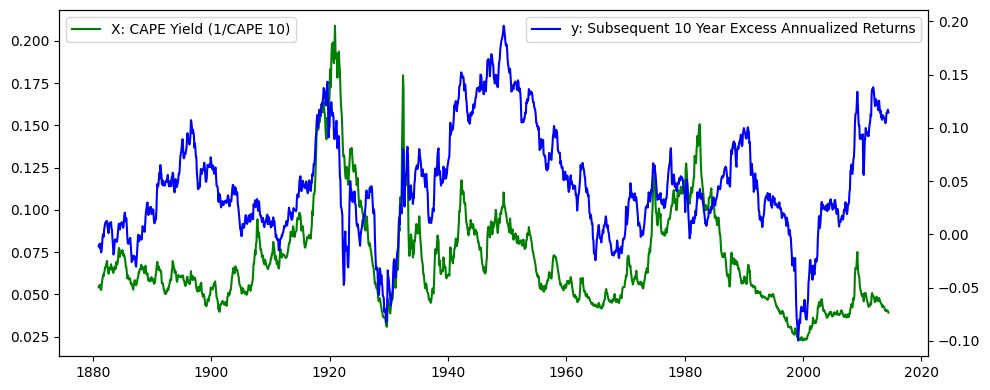

In [9]:
# get existing signal from the training data
data_ols = data.loc['1871-01': '2023-12', ['CAPE', '10YearExcessAnnualizedReturns']].dropna()
X = 1/data_ols['CAPE']
y = data_ols['10YearExcessAnnualizedReturns']
# plot
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(X, color='g', label='X: CAPE Yield (1/CAPE 10)')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(y, color='b', label='y: Subsequent 10 Year Excess Annualized Returns')
ax2.legend(loc='upper right')
fig.tight_layout()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     10YearExcessAnnualizedReturns   R-squared:                       0.132
Model:                                       OLS   Adj. R-squared:                  0.132
Method:                            Least Squares   F-statistic:                     244.2
Date:                           Mon, 12 Aug 2024   Prob (F-statistic):           2.42e-51
Time:                                   02:51:09   Log-Likelihood:                 2613.2
No. Observations:                           1602   AIC:                            -5222.
Df Residuals:                               1600   BIC:                            -5212.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.003      0.784      0.433      -0.004       0.008
CAPE           0.6110      0.039     15.627      0.000       0.534       0.688
==============================================================================
Omnibus:                       42.345   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.499
Skew:                           0.383   Prob(JB):                     3.58e-10
Kurtosis:                       2.743   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

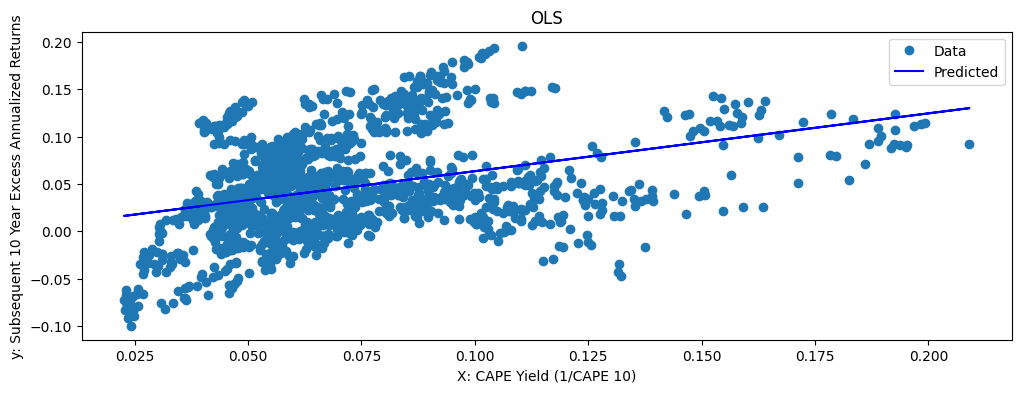

In [10]:
# linear regression
olsres = sm.OLS(y, sm.add_constant(X)).fit()
# plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, y, "o", label="Data")
ax.plot(X, olsres.fittedvalues, "b-", label="Predicted")
ax.legend(loc="best")
ax.set_xlabel('X: CAPE Yield (1/CAPE 10)')
ax.set_ylabel('y: Subsequent 10 Year Excess Annualized Returns')
ax.set_title('OLS')

olsres.summary()

### 2.2. Signal Research

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1836 entries, 1871-01-01 to 2023-12-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RealPrice             1836 non-null   float64
 1   RealEarnings          1836 non-null   float64
 2   RealTotalReturnPrice  1836 non-null   float64
 3   RealTotalBondReturns  1836 non-null   float64
dtypes: float64(4)
memory usage: 71.7 KB


#### 2.2.1. Different X - CAPE Yield (1/CAPE)

In [12]:
def apply_func(row, years, weighted, return_type, data):
    curr_date = row.name
    prev_date = curr_date + pd.DateOffset(years=-years)
    # return NaN if no previous date exists
    start_date = data.iloc[0].name
    if prev_date < start_date:
        return np.nan
    # calculate CAPE yield with different weighting methods
    real_price = row['RealPrice']
    #real_earnings_series = data.loc[prev_date: curr_date + pd.DateOffset(months=-1), 'RealEarnings']
    real_earnings_series = data.loc[prev_date: curr_date, 'RealEarnings']
    # 1. Simple Average
    if weighted == 'average':
        real_earnings_avg = real_earnings_series.mean()
    # 2. Exponential Weighted Moving Average
    # gives more weight to recent data and less weight to older data
    # EWMA(t) = alpha * r(t) + (1-alpha) * EWMA(t-1)
    elif weighted == 'exponential':
        real_earnings_avg = real_earnings_series.ewm(alpha=0.05).mean()[-1]
    # 3. Normally Distributed Weighted Average
    elif weighted == 'normal':
        x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), len(real_earnings_series))
        normal_weights = pd.Series(norm.pdf(x) / norm.pdf(x).sum()) # weights sum equals 1
        real_earnings_avg = np.average(real_earnings_series, weights=normal_weights)
    # 4. Hodrick-Prescott Filter (point-in-time)
    elif weighted == 'hpfilter':
        cycle, trend = sm.tsa.filters.hpfilter(real_earnings_series, lamb=14400) # HP filter: lambda for monthly data
        real_earnings_avg = trend[-1]

    cape_yield = round(real_earnings_avg / real_price, 4)
    if return_type == 'earnings-average':
        return round(real_earnings_avg, 4)
    elif return_type == 'cape-yield':
        return cape_yield

# generate columns for x
for weighted in ['average', 'exponential', 'normal', 'hpfilter']:
    for year in [5, 10]:
        for return_type in ['earnings-average', 'cape-yield']:
            col_name = 'RealEarnings' if return_type == 'earnings-average' else 'CAPEYield'
            col_name += 'Average' if weighted == 'average' else 'ExponentialAverage' if weighted == 'exponential' else 'NormalAverage' if weighted == 'normal' else 'HPFilterAverage'
            col_name += '5Y' if year == 5 else '10Y'
            data_train[col_name] = data_train.apply(
                lambda row: apply_func(row, years=year, weighted=weighted, return_type=return_type, data=data_train), axis=1)

data_train.loc['1881-01': '1881-03']

,RealPrice,RealEarnings,RealTotalReturnPrice,RealTotalBondReturns,RealEarningsAverage5Y,CAPEYieldAverage5Y,RealEarningsAverage10Y,CAPEYieldAverage10Y,RealEarningsExponentialAverage5Y,CAPEYieldExponentialAverage5Y,RealEarningsExponentialAverage10Y,CAPEYieldExponentialAverage10Y,RealEarningsNormalAverage5Y,CAPEYieldNormalAverage5Y,RealEarningsNormalAverage10Y,CAPEYieldNormalAverage10Y,RealEarningsHPFilterAverage5Y,CAPEYieldHPFilterAverage5Y,RealEarningsHPFilterAverage10Y,CAPEYieldHPFilterAverage10Y
Date,,,,,,,,,,,,,,,,,,,,
1881-01-01,206.6483,16.2181,382.3093,2.4223,11.4896,0.0556,11.2275,0.0543,13.2872,0.0643,13.2055,0.0639,11.1963,0.0542,10.7846,0.0522,15.7271,0.0761,15.7352,0.0761
1881-02-01,203.9204,15.9203,378.6383,2.4068,11.5827,0.0568,11.2757,0.0553,13.4318,0.0659,13.3419,0.0654,11.3244,0.0555,10.7919,0.0529,15.9036,0.0780,15.9162,0.0781
1881-03-01,206.2339,15.7815,384.3404,2.4155,11.6766,0.0566,11.3252,0.0549,13.5624,0.0658,13.4644,0.0653,11.4549,0.0555,10.8007,0.0524,16.0413,0.0778,16.0585,0.0779


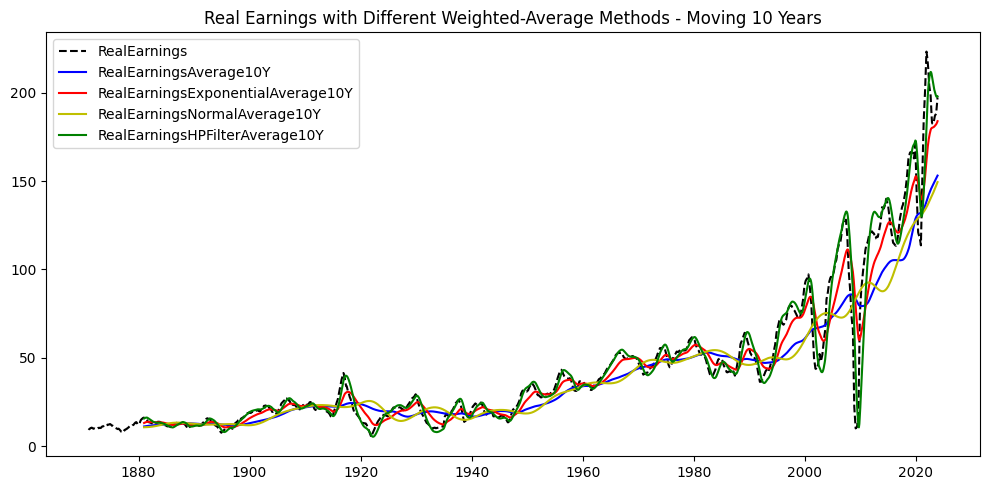

In [13]:
# plot the real earnings (10Y) average with different weighting methods
earnings10_name_list = ['RealEarnings', 'RealEarningsAverage10Y', 'RealEarningsExponentialAverage10Y',
                        'RealEarningsNormalAverage10Y', 'RealEarningsHPFilterAverage10Y']

fig, ax = plt.subplots(figsize=(10, 5))
for earnings_name, fmt in zip(earnings10_name_list, ['k--', 'b', 'r', 'y', 'g']):
    ax.plot(data_train[earnings_name], fmt, label=earnings_name)
ax.legend(loc='upper left')
ax.set_title('Real Earnings with Different Weighted-Average Methods - Moving 10 Years')
fig.tight_layout()

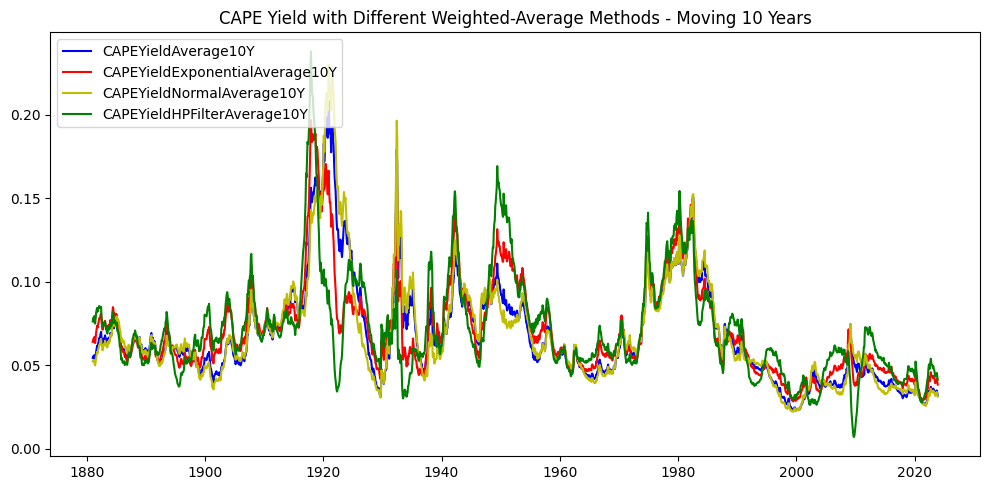

In [14]:
# plot X (10Y)
X10_name_list = ['CAPEYieldAverage10Y', 'CAPEYieldExponentialAverage10Y', 'CAPEYieldNormalAverage10Y', 'CAPEYieldHPFilterAverage10Y']

fig, ax = plt.subplots(figsize=(10, 5))
for X_name, c in zip(X10_name_list, ['b', 'r', 'y', 'g']):
    ax.plot(data_train[X_name], color=c, label=X_name, linewidth=1.5)
ax.legend(loc='upper left')
ax.set_title('CAPE Yield with Different Weighted-Average Methods - Moving 10 Years')
fig.tight_layout()

#### 2.2.2. Different y - Subsequent Excess Annualized Returns

In [15]:
def apply_func(row, years, data):
    curr_date = row.name
    future_date = curr_date + pd.DateOffset(years=years)
    # return NaN if no future date exists
    end_date = data.iloc[-1].name
    if future_date > end_date:
        return np.nan
    # calculate future annualized stock and bond returns
    future_annualized_stock_real_return = (
        data.loc[future_date, 'RealTotalReturnPrice'] / data.loc[curr_date, 'RealTotalReturnPrice'])**(1/years) - 1
    future_annualized_bond_real_return = (
        data.loc[future_date, 'RealTotalBondReturns'] / data.loc[curr_date, 'RealTotalBondReturns'])**(1/years) - 1
    return round(future_annualized_stock_real_return - future_annualized_bond_real_return, 4)

# generate columns for y
y_name_list = ['SubsequentExcessAnnualizedReturns3Y', 'SubsequentExcessAnnualizedReturns5Y', 'SubsequentExcessAnnualizedReturns10Y']
for y_name, year in zip(y_name_list, [3, 5, 10]):
    data_train[y_name] = data_train.apply(lambda row: apply_func(row, years=year, data=data_train), axis=1)
data_train.loc['1881-01': '1881-03', y_name_list]

,SubsequentExcessAnnualizedReturns3Y,SubsequentExcessAnnualizedReturns5Y,SubsequentExcessAnnualizedReturns10Y
Date,,,
1881-01-01,-0.0455,-0.0203,-0.0111
1881-02-01,-0.0351,-0.0152,-0.0094
1881-03-01,-0.0398,-0.0216,-0.0125


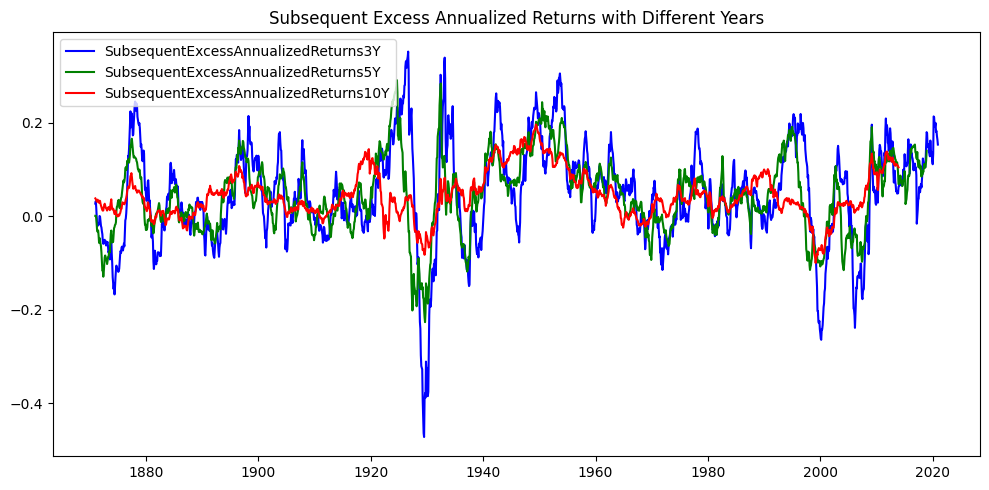

In [16]:
# plot y
fig, ax = plt.subplots(figsize=(10, 5))
for y_name, c in zip(y_name_list, ['b', 'g', 'r']):
    ax.plot(data_train[y_name], color=c, label=y_name)
ax.legend(loc='upper left')
ax.set_title('Subsequent Excess Annualized Returns with Different Years')
fig.tight_layout()

#### 2.2.3. Linear Regression for Different Combinations of X and y

In [17]:
X_name_list = ['CAPEYieldAverage5Y', 'CAPEYieldExponentialAverage5Y', 'CAPEYieldNormalAverage5Y', 'CAPEYieldHPFilterAverage5Y',
               'CAPEYieldAverage10Y', 'CAPEYieldExponentialAverage10Y', 'CAPEYieldNormalAverage10Y', 'CAPEYieldHPFilterAverage10Y']
y_name_list = ['SubsequentExcessAnnualizedReturns3Y', 'SubsequentExcessAnnualizedReturns5Y', 'SubsequentExcessAnnualizedReturns10Y']

data_train_signal_res = pd.DataFrame()
for X_name in X_name_list:
    for y_name in y_name_list:
        X = data_train[X_name]
        y = data_train[y_name]
        olsres = sm.OLS(y, sm.add_constant(X), missing='drop').fit(cov_type='HC0')
        # get regression result
        res = dict()
        res['X'] = X_name
        res['y'] = y_name
        res['beta'] = round(olsres.params[X_name], 4)
        res['beta-pval'] = round(olsres.pvalues[X_name], 4)
        res['beta-significant'] = True if olsres.pvalues[X_name] < 0.05 else False
        res['R-squared'] = round(olsres.rsquared, 4)
        data_train_signal_res = pd.concat([data_train_signal_res, pd.Series(res)], axis=1)
        
data_train_signal_res = data_train_signal_res.transpose().set_index(['X', 'y'])
data_train_signal_res['beta'] = data_train_signal_res['beta'].astype(float)
data_train_signal_res['beta-pval'] = data_train_signal_res['beta-pval'].astype(float)
data_train_signal_res['R-squared'] = data_train_signal_res['R-squared'].astype(float)
data_train_signal_res

beta  \
X                              y                                              
CAPEYieldAverage5Y             SubsequentExcessAnnualizedReturns3Y   0.7705   
                               SubsequentExcessAnnualizedReturns5Y   0.8452   
                               SubsequentExcessAnnualizedReturns10Y  0.6572   
CAPEYieldExponentialAverage5Y  SubsequentExcessAnnualizedReturns3Y   0.8242   
                               SubsequentExcessAnnualizedReturns5Y   0.8435   
                               SubsequentExcessAnnualizedReturns10Y  0.7743   
CAPEYieldNormalAverage5Y       SubsequentExcessAnnualizedReturns3Y   0.6280   
                               SubsequentExcessAnnualizedReturns5Y   0.7288   
                               SubsequentExcessAnnualizedReturns10Y  0.5956   
CAPEYieldHPFilterAverage5Y     SubsequentExcessAnnualizedReturns3Y   0.7642   
                               SubsequentExcessAnnualizedReturns5Y   0.6536   
                               SubsequentExcessAnnualizedReturns10Y  0.6978   
CAPEYieldAverage10Y            SubsequentExcessAnnualizedReturns3Y   0.8818   
                               SubsequentExcessAnnualizedReturns5Y   0.9202   
                               SubsequentExcessAnnualizedReturns10Y  0.6260   
CAPEYieldExponentialAverage10Y SubsequentExcessAnnualizedReturns3Y   0.8060   
                               SubsequentExcessAnnualizedReturns5Y   0.8410   
                               SubsequentExcessAnnualizedReturns10Y  0.7765   
CAPEYieldNormalAverage10Y      SubsequentExcessAnnualizedReturns3Y   0.8202   
                               SubsequentExcessAnnualizedReturns5Y   0.8935   
                               SubsequentExcessAnnualizedReturns10Y  0.5336   
CAPEYieldHPFilterAverage10Y    SubsequentExcessAnnualizedReturns3Y   0.7315   
                               SubsequentExcessAnnualizedReturns5Y   0.6338   
                               SubsequentExcessAnnualizedReturns10Y  0.6969   

                                                                     beta-pval  \
X                              y                                                 
CAPEYieldAverage5Y             SubsequentExcessAnnualizedReturns3Y         0.0   
                               SubsequentExcessAnnualizedReturns5Y         0.0   
                               SubsequentExcessAnnualizedReturns10Y        0.0   
CAPEYieldExponentialAverage5Y  SubsequentExcessAnnualizedReturns3Y         0.0   
                               SubsequentExcessAnnualizedReturns5Y         0.0   
                               SubsequentExcessAnnualizedReturns10Y        0.0   
CAPEYieldNormalAverage5Y       SubsequentExcessAnnualizedReturns3Y         0.0   
                               SubsequentExcessAnnualizedReturns5Y         0.0   
                               SubsequentExcessAnnualizedReturns10Y        0.0   
CAPEYieldHPFilterAverage5Y     SubsequentExcessAnnualizedReturns3Y         0.0   
                               SubsequentExcessAnnualizedReturns5Y         0.0   
                               SubsequentExcessAnnualizedReturns10Y        0.0   
CAPEYieldAverage10Y            SubsequentExcessAnnualizedReturns3Y         0.0   
                               SubsequentExcessAnnualizedReturns5Y         0.0   
                               SubsequentExcessAnnualizedReturns10Y        0.0   
CAPEYieldExponentialAverage10Y SubsequentExcessAnnualizedReturns3Y         0.0   
                               SubsequentExcessAnnualizedReturns5Y         0.0   
                               SubsequentExcessAnnualizedReturns10Y        0.0   
CAPEYieldNormalAverage10Y      SubsequentExcessAnnualizedReturns3Y         0.0   
                               SubsequentExcessAnnualizedReturns5Y         0.0   
                               SubsequentExcessAnnualizedReturns10Y        0.0   
CAPEYieldHPFilterAverage10Y    SubsequentExcessAnnualizedReturns3Y         0.0   
                               SubsequentExcessA

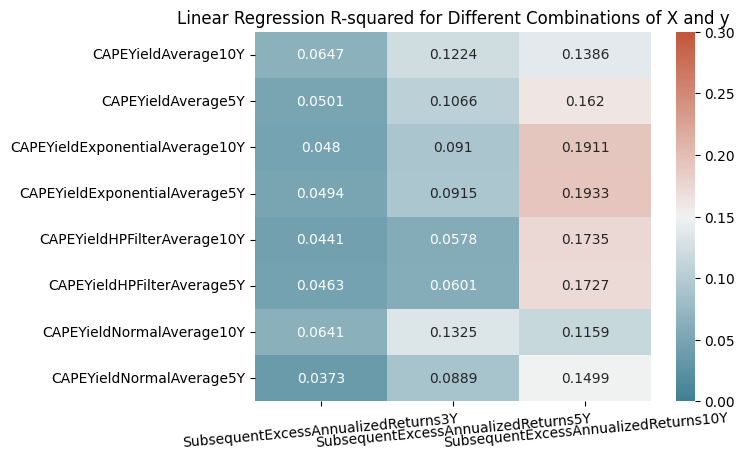

In [18]:
df = data_train_signal_res['R-squared'].unstack('y')[y_name_list]
sns.heatmap(df, annot=True, fmt='.4', vmin=0, vmax=0.3, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Linear Regression R-squared for Different Combinations of X and y')
plt.xticks(rotation=5)
plt.xlabel('')
plt.ylabel('')
fig.tight_layout()

## 3. Signal Categorization

### 3.1. Initial Example

In [19]:
def plot_signal_categories_time_series(signal_name, signal_df, thresholds):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(signal_df['SignalCategoryIndex'], label='SignalCategoryIndex')
    ax.set_title(signal_name + ': ' + str(thresholds))
    ax.legend(loc='upper left')
def plot_signal_series_with_categories(signal_name, signal_series, thresholds):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.plot(signal_series, color='b', label=signal_name)
    ax1.legend(loc='center right')
    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())
    for threshold in thresholds[1:5]:
        ax2.axhline(threshold, color='r', linestyle='dashed')
    ax2.set_yticks(thresholds[1:5], labels=thresholds[1:5])
    ax2.set_title(signal_name + ' with Categorization')
    fig.tight_layout()
def get_signal_categorization(signal_name, signal_series, thresholds, ifprint=True):
    # 1. generate categories based on thresholds
    signal_df = signal_series.to_frame(signal_name)
    cat_names = ['bond', 'weak-bond', 'neutral', 'weak-stock', 'stock']
    cat_mapping = {'bond': -1, 'weak-bond': -0.5, 'neutral': 0, 'weak-stock': 0.5, 'stock': 1}
    signal_df['SignalCategoryName'] = pd.cut(signal_series, bins=thresholds, labels=cat_names, retbins=False)
    signal_df['SignalCategoryIndex'] = signal_df['SignalCategoryName'].map(cat_mapping).astype(float)
    # 2. calculate percentage for each categories
    cat_ratio = signal_df['SignalCategoryName'].value_counts(normalize=True)
    if ifprint:
        print('\n1. Percentage of Different Signal Categories based on Given Thresholds\n----------------------------------------------------------------------')
        print(round(cat_ratio, 3))
    # 3. calculate related metrics based on current threshold
    # absolutely turnover
    signal_df['Diff'] = signal_df['SignalCategoryIndex'].diff()
    abs_turnover = round(signal_df['Diff'].abs().mean(), 4)
    # count of large change, if change at least two levels at once
    large_change_cnt = len(signal_df[signal_df['Diff'].abs() >= 1]) 
    # count of jump, if the signal jump in one month and jump back in the next month
    signal_df['DiffRollingMean'] = signal_df['Diff'].rolling(2).mean()
    jump_cnt = len(signal_df[(signal_df['Diff'] != 0) & (signal_df['DiffRollingMean'] == 0)])
    if ifprint:
        print('\n2. Other Metrics\n----------------------------------------------------------------------')
        print('Absolutely Turnover: ', abs_turnover)
        print('Count of Large Change: ', large_change_cnt)
        print('Count of Jump: ', jump_cnt)
    # 4. plot time series of signal categories
    if ifprint:
        plot_signal_categories_time_series(signal_name, signal_df, thresholds)
    # 5. plot signal series with categorization
    if ifprint:
        plot_signal_series_with_categories(signal_name, signal_series, thresholds)
    
    return {'signal_df': signal_df, 'cat_ratio': cat_ratio,
            'abs_turnover': abs_turnover, 'large_change_cnt': large_change_cnt, 'jump_cnt': jump_cnt}


1. Percentage of Different Signal Categories based on Given Thresholds
----------------------------------------------------------------------
neutral       0.388
weak-bond     0.308
weak-stock    0.142
stock         0.107
bond          0.056
Name: SignalCategoryName, dtype: float64

2. Other Metrics
----------------------------------------------------------------------
Absolutely Turnover:  0.0385
Count of Large Change:  0
Count of Jump:  27


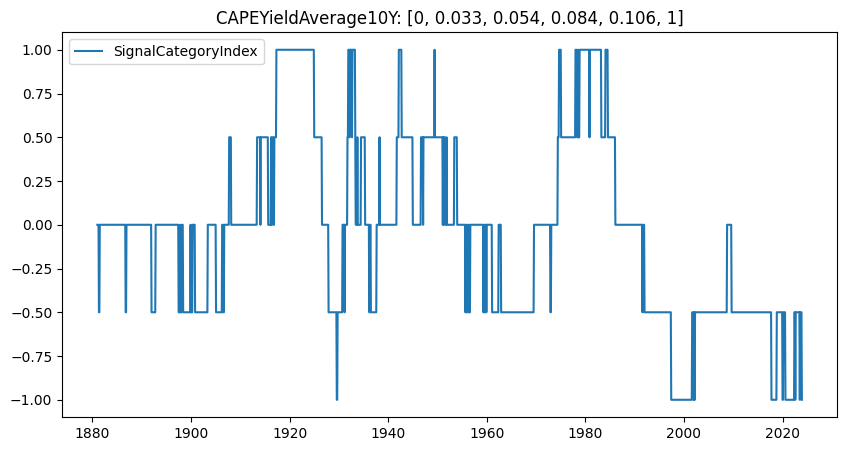

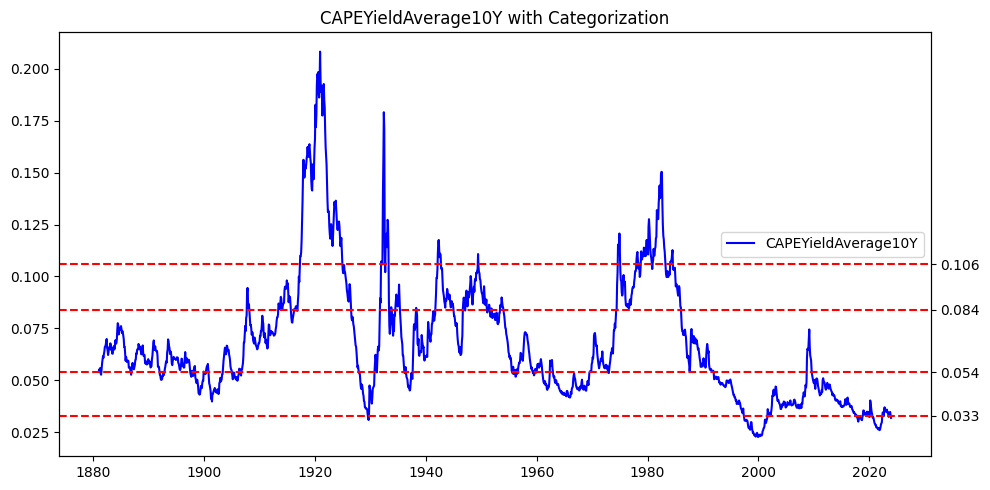

In [20]:
signal_name = 'CAPEYieldAverage10Y'
signal_series = data_train[signal_name].dropna()
# categories: 'bond', 'weak-bond', 'neutral', 'weak-stock', 'stock'
thresholds = [0, 0.033, 0.054, 0.084, 0.106, 1]

res = get_signal_categorization(signal_name, signal_series, thresholds)

### 3.2. Categorization Research for Single Signal

In [21]:
def plot_signal_dist(signal_name, signal_series):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(signal_series, kde=True, ax=axes[0])
    axes[0].set_title('Signal Distribution Plot')
    signal_series.plot.box(ax=axes[1])
    axes[1].set_title('Signal Box Plot')
    print(signal_name, '\n----------------------------------------------------------------------')
    print(signal_series.describe())
def generate_thresholds_list(signal_series):
    # generate list of thresholds based on mean and std
    _mean, _std = signal_series.mean(), signal_series.std()
    threshold1 = [0, round(_mean - 1.0 * _std, 3), round(_mean - 0.3 * _std, 3), round(_mean + 0.3 * _std, 3), round(_mean + 1.0 * _std, 3), 1] 
    threshold2 = [0, round(_mean - 1.2 * _std, 3), round(_mean - 0.5 * _std, 3), round(_mean + 0.5 * _std, 3), round(_mean + 1.2 * _std, 3), 1]
    threshold3 = [0, round(_mean - 1.4 * _std, 3), round(_mean - 0.7 * _std, 3), round(_mean + 0.7 * _std, 3), round(_mean + 1.4 * _std, 3), 1]
    threshold4 = [0, round(_mean - 1.6 * _std, 3), round(_mean - 0.9 * _std, 3), round(_mean + 0.9 * _std, 3), round(_mean + 1.6 * _std, 3), 1]
    thresholds_list = [threshold1, threshold2, threshold3, threshold4]
    return thresholds_list
def compare_signal_categorization(signal_name, signal_series, thresholds_list):
    # get comparison result
    signal_categorization_compare_res = pd.DataFrame()
    for thresholds in thresholds_list:
        # get thresholds
        res = dict()
        res['thresholds'] = thresholds
        # get result from signal categorization
        catres = get_signal_categorization(signal_name, signal_series, thresholds, ifprint=False)
        cat_ratio = catres['cat_ratio']
        res['bond'] = '{:.1%}'.format(cat_ratio['bond'])
        res['weak-bond'] = '{:.1%}'.format(cat_ratio['weak-bond'])
        res['neutral'] = '{:.1%}'.format(cat_ratio['neutral'])
        res['weak-stock'] = '{:.1%}'.format(cat_ratio['weak-stock'])
        res['stock'] = '{:.1%}'.format(cat_ratio['stock'])
        res['abs_turnover'] = catres['abs_turnover']
        #res['large_change_cnt'] = catres['large_change_cnt']
        res['jump_cnt'] = catres['jump_cnt']
        signal_categorization_compare_res = pd.concat([signal_categorization_compare_res, pd.Series(res)], axis=1)
        # for time series for current categorization
        plot_signal_categories_time_series(signal_name, catres['signal_df'], thresholds)
    signal_categorization_compare_res = signal_categorization_compare_res.transpose().set_index('thresholds')
    
    print(tabulate(signal_categorization_compare_res, headers='keys', tablefmt='psql'))
    return signal_categorization_compare_res

CAPEYieldAverage10Y 
----------------------------------------------------------------------
count    1716.000000
mean        0.068242
std         0.030584
min         0.022700
25%         0.047375
50%         0.060550
75%         0.083625
max         0.208300
Name: CAPEYieldAverage10Y, dtype: float64


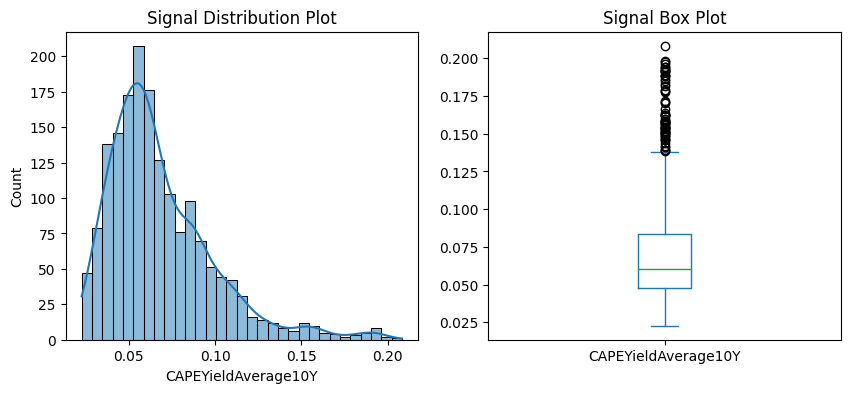

In [22]:
signal_name = 'CAPEYieldAverage10Y'
signal_series = data_train[signal_name].dropna()

plot_signal_dist(signal_name, signal_series)

+------------------------------------+--------+-------------+-----------+--------------+---------+----------------+------------+
| thresholds                         | bond   | weak-bond   | neutral   | weak-stock   | stock   |   abs_turnover |   jump_cnt |
|------------------------------------+--------+-------------+-----------+--------------+---------+----------------+------------|
| [0, 0.038, 0.059, 0.077, 0.099, 1] | 11.6%  | 35.0%       | 23.5%     | 16.0%        | 13.8%   |         0.0394 |         29 |
| [0, 0.032, 0.053, 0.084, 0.105, 1] | 4.7%   | 30.0%       | 40.5%     | 14.0%        | 10.8%   |         0.0338 |         22 |
| [0, 0.025, 0.047, 0.09, 0.111, 1]  | 1.2%   | 23.2%       | 56.9%     | 9.9%         | 8.7%    |         0.0329 |         27 |
| [0, 0.019, 0.041, 0.096, 0.117, 1] | 0.0%   | 15.7%       | 69.1%     | 8.4%         | 6.8%    |         0.0178 |         10 |
+------------------------------------+--------+-------------+-----------+--------------+---------

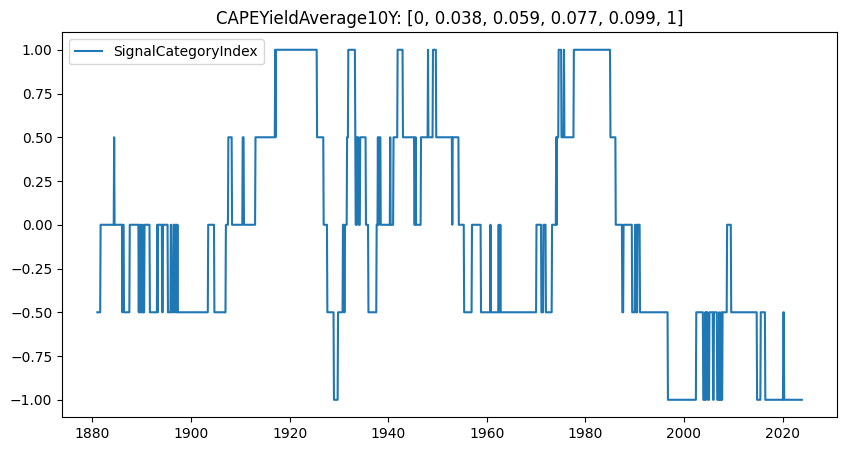

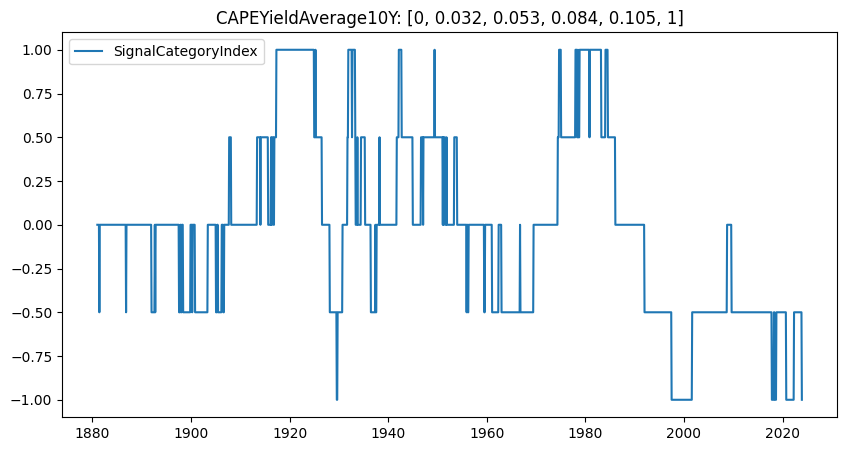

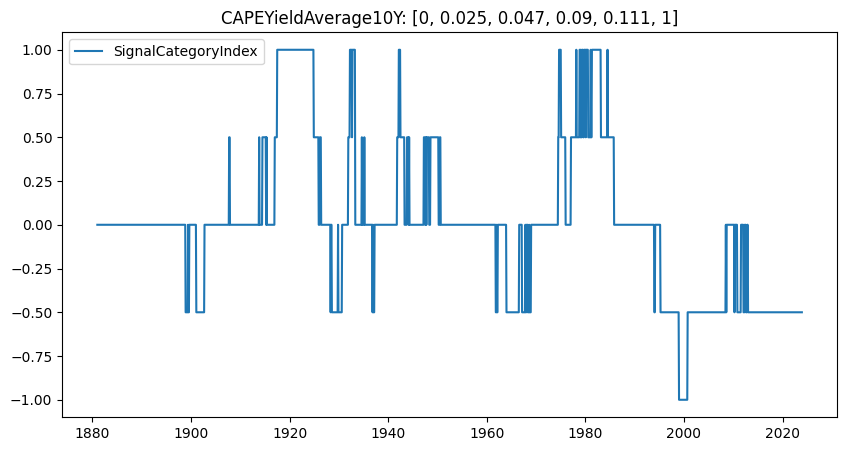

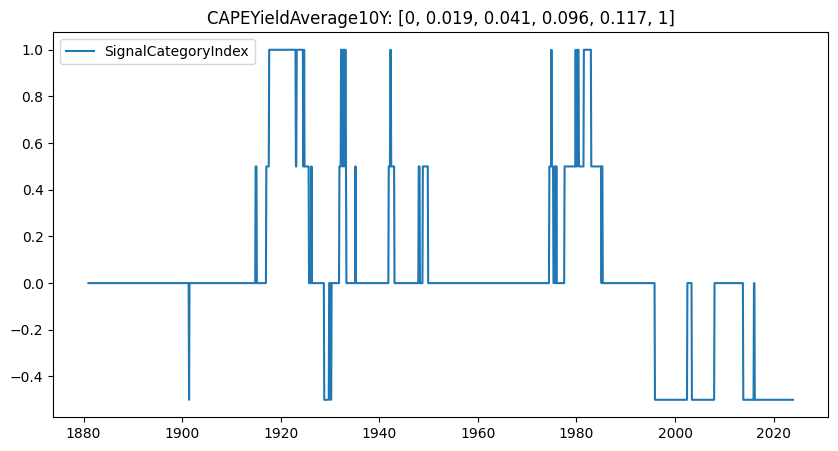

In [23]:
thresholds_list = generate_thresholds_list(signal_series)
_ = compare_signal_categorization(signal_name, signal_series, thresholds_list)

## 4. Back-Testing

- y: SubsequentExcessAnnualizedReturns10Y

### 4.1. Initial Example

In [24]:
def apply_func(row, years, data, return_type):
    curr_date = row.name
    future_date = curr_date + pd.DateOffset(years=years)
    # return NaN if no future date exists
    end_date = data.iloc[-1].name
    if future_date > end_date:
        return np.nan
    # calculate future annualized stock and bond returns
    stock_total_return = data.loc[future_date, 'RealTotalReturnPrice'] / row['RealTotalReturnPrice']
    bond_total_return = data.loc[future_date, 'RealTotalBondReturns'] / row['RealTotalBondReturns']
    stock_annualized_return = stock_total_return ** (1 / years) - 1
    bond_annualized_return = bond_total_return ** (1 / years) - 1
    # calculate annualized return for the benchmark portfolio with 0.6/0.4 weights
    portfolio_benchmark_total_return =  0.6 * stock_total_return + 0.4 * bond_total_return
    portfolio_benchmark_annualized_return = portfolio_benchmark_total_return ** (1 / years) - 1
    # calculate annualized return for the portfolio with specified weights
    stock_weight = row['StockWeights']
    portfolio_total_return =  stock_weight * stock_total_return + (1 - stock_weight) * bond_total_return
    portfolio_annualized_return = portfolio_total_return ** (1 / years) - 1
    # return
    if return_type == 'portfolio':
        return round(portfolio_annualized_return, 4)
    elif return_type == 'benchmark':
        return round(portfolio_benchmark_annualized_return, 4)
    elif return_type == 'stock':
        return round(stock_annualized_return, 4)
    elif return_type == 'bond':
        return round(bond_annualized_return, 4)

def get_portfolio_return(data, signal_name, thresholds, ifplot=True):
    # get signal series
    signal_series = data[signal_name].dropna()
    # get signal categorization
    catres = get_signal_categorization(signal_name, signal_series, thresholds, ifprint=False)
    # combine signal data and return data
    signal_cat_ret = pd.merge(
        left=catres['signal_df'], right=data,
        how='inner',
        left_index=True, right_index=True,
        suffixes = [None, '_y']
    )[[signal_name, 'SignalCategoryName', 'SignalCategoryIndex', 'RealTotalReturnPrice', 'RealTotalBondReturns']]
    # add mapped weights
    #stock_weight_mapping = {'bond': 0.5, 'weak-bond': 0.55, 'neutral': 0.6, 'weak-stock': 0.65, 'stock': 0.7}
    stock_weight_mapping = {'bond': 0.4, 'weak-bond': 0.5, 'neutral': 0.6, 'weak-stock': 0.7, 'stock': 0.8}
    signal_cat_ret['StockWeights'] = signal_cat_ret['SignalCategoryName'].map(stock_weight_mapping).astype(float)
    signal_cat_ret.head(3)
    # add returns
    signal_cat_ret['StockAnnualizedReturn10Y'] = signal_cat_ret.apply(lambda row: apply_func(row, years=10, data=signal_cat_ret, return_type='stock'), axis=1)
    signal_cat_ret['BondAnnualizedReturn10Y'] = signal_cat_ret.apply(lambda row: apply_func(row, years=10, data=signal_cat_ret, return_type='bond'), axis=1)
    signal_cat_ret['PortfolioAnnualizedReturn10YBenchmark'] = signal_cat_ret.apply(lambda row: apply_func(row, years=10, data=signal_cat_ret, return_type='benchmark'), axis=1)
    signal_cat_ret['PortfolioAnnualizedReturn10Y'] = signal_cat_ret.apply(lambda row: apply_func(row, years=10, data=signal_cat_ret, return_type='portfolio'), axis=1)
    # get equivalently monthly return
    signal_cat_ret['PortfolioMonthlyReturn'] = signal_cat_ret['PortfolioAnnualizedReturn10Y'] / 12
    # plot
    if ifplot:
        fig, ax = plt.subplots(figsize=(10, 6))
        col_list = ['StockAnnualizedReturn10Y', 'BondAnnualizedReturn10Y', 'PortfolioAnnualizedReturn10YBenchmark', 'PortfolioAnnualizedReturn10Y']
        for col, fmt in zip(col_list, ['b', 'g', 'k', 'r--']):
            ax.plot(signal_cat_ret[col], fmt, label=col)
        ax.legend(loc='upper left')
        ax.set_title('Back-Testing with Signal: ' + signal_name)
        fig.tight_layout()
    
    return signal_cat_ret

,CAPEYieldAverage10Y,SignalCategoryName,SignalCategoryIndex,RealTotalReturnPrice,RealTotalBondReturns,StockWeights,StockAnnualizedReturn10Y,BondAnnualizedReturn10Y,PortfolioAnnualizedReturn10YBenchmark,PortfolioAnnualizedReturn10Y,PortfolioMonthlyReturn
Date,,,,,,,,,,,
1881-01-01,0.0543,neutral,0.0,382.3093,2.4223,0.6,0.0454,0.0565,0.0499,0.0499,0.004158
1881-02-01,0.0553,neutral,0.0,378.6383,2.4068,0.6,0.0468,0.0562,0.0506,0.0506,0.004217
1881-03-01,0.0549,neutral,0.0,384.3404,2.4155,0.6,0.0424,0.0549,0.0476,0.0476,0.003967


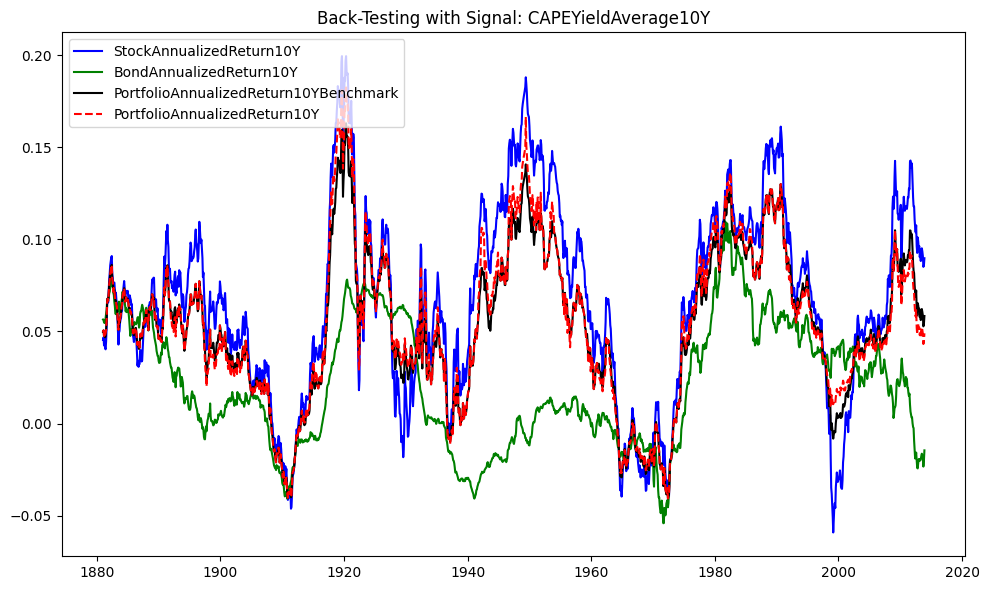

In [25]:
portfolio_ret = get_portfolio_return(
    data=data_train, signal_name='CAPEYieldAverage10Y', thresholds=[0, 0.033, 0.054, 0.084, 0.106, 1])
portfolio_ret.head(3)

### 4.2. Different Strategies

In [26]:
# strategies with different signal and categorization
strategy_list = [
    ('S1-CAPEAvg10Y', 'CAPEYieldAverage10Y', [0, 0.033, 0.054, 0.084, 0.106, 1]),
    ('S2-CAPEAvg5Y', 'CAPEYieldAverage5Y', [0, 0.035, 0.057, 0.087, 0.109, 1]),
    ('S3-CAPEExpAvg10Y', 'CAPEYieldExponentialAverage10Y', [0, 0.037, 0.057, 0.086, 0.106, 1]),
    ('S4-CAPEExpAvg5Y', 'CAPEYieldExponentialAverage5Y', [0, 0.038, 0.058, 0.087, 0.106, 1]),
    ('S5-CAPEHPAvg10Y', 'CAPEYieldHPFilterAverage10Y', [0, 0.036, 0.057, 0.088, 0.109, 1])
]
# get back-testing results for each strategy
signal_category_res = pd.DataFrame()
portfolio_return_res = pd.DataFrame()

for strategy_name, signal_name, thresholds in strategy_list:
    portfolio_return = get_portfolio_return(data=data_train, signal_name=signal_name, thresholds=thresholds, ifplot=False)
    signal_category_res[strategy_name] = portfolio_return['SignalCategoryIndex']
    portfolio_return_res[strategy_name] = portfolio_return['PortfolioMonthlyReturn']

# add benchmark (0.6/0.4 for portfolio return)
portfolio_return_res.insert (0, 'Benchmark-0.6/0.4', portfolio_return['PortfolioAnnualizedReturn10YBenchmark']/12)

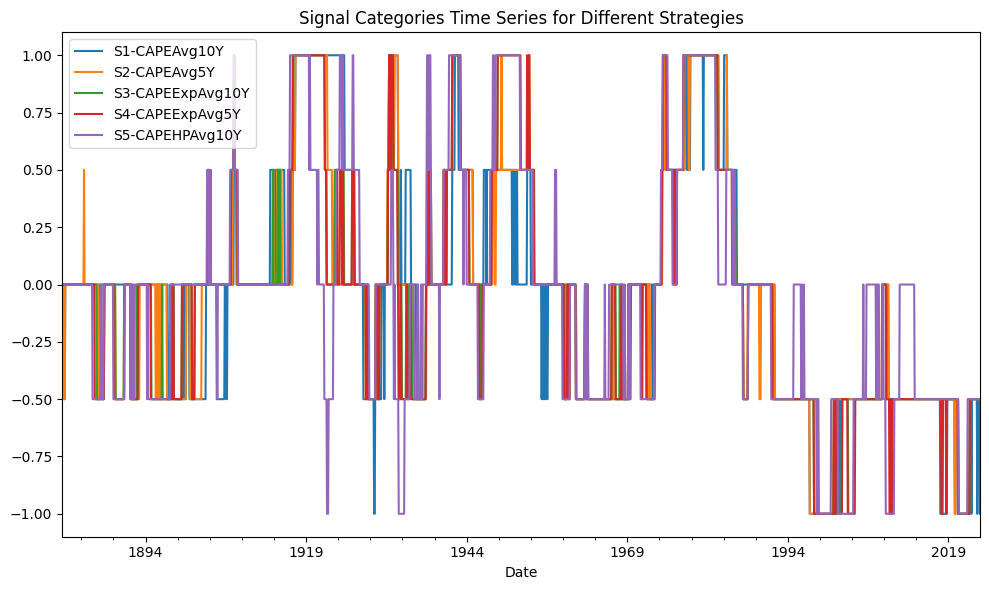

In [27]:
# plot signal categories time series for different strategies
fig, ax = plt.subplots(figsize=(10, 6))
signal_category_res.plot(ax=ax)
ax.set_title('Signal Categories Time Series for Different Strategies')
ax.legend(loc='upper left')
fig.tight_layout()

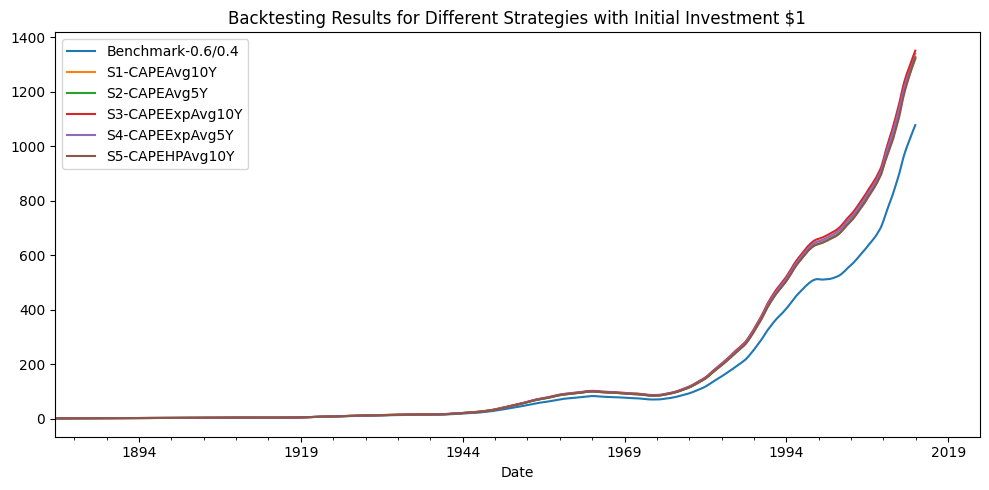

In [28]:
c_return = (1 + portfolio_return_res).cumprod()
fig, ax = plt.subplots(figsize=(10, 5))
c_return.plot(ax=ax)
ax.set_title('Backtesting Results for Different Strategies with Initial Investment $1')
ax.legend(loc='upper left')
fig.tight_layout()

### 4.3. Portfolio Analysis

In [29]:
def maximum_drawdown(price):
    window = price.shape[0] # whole period
    # 1. calculate single period drawdown
    roll_max = price.rolling(window, min_periods=1).max()
    single_period_drawdown = price/roll_max - 1.0 # negative return
    # 2. calculate MDD among all single period drawdown
    max_drawdown = single_period_drawdown.rolling(window, min_periods=1).min() # minimum negative return
    # return
    return max_drawdown.iloc[-1, :]

def portfolio_analysis(p_return, freq):
    p_return = p_return.dropna()
    # set frequency
    if freq == 'M':
        freq = 12
    if freq == 'D':
        freq = 252
    # cummulative return
    c_return = (1 + p_return).cumprod()
    c_pnl = c_return - 1
    # annualized return
    year = c_return.shape[0] / freq
    annualized_return = c_return.iloc[-1, :] ** (1/year) - 1
    # annualized volatility
    annualized_vol = p_return.std() * np.sqrt(freq)
    # information ratio
    ir = annualized_return / annualized_vol
    # minimum return
    min_return = p_return.min()
    # skewness
    skew = p_return.skew()
    # var
    var = p_return.apply(lambda x: np.percentile(x, 5), axis=0)
    # cvar
    cvar = p_return.apply(lambda x: x[x <= np.percentile(x, 10)].mean(), axis=0)
    # hit rate: the percentage of positions that have generated positive returns
    hit_ratio = (p_return > 0).sum() / (p_return.count() - (p_return == 0).sum())
    # maximum drawdown
    mdd = maximum_drawdown(c_return)
    # result table (percentage)
    res = pd.concat(objs=[annualized_return * 100, annualized_vol * 100, ir, mdd * 100
                          , var * 100, cvar * 100, skew, hit_ratio, min_return * 100], axis=1).transpose()
    res.index = ['Annualized Return (%)', 'Annualized Volatility (%)', 'Information Ratio', 'Maximum Drawdown (%)'
                 , 'VaR at 0.05 (%)', 'CVaR at 0.1 (%)', 'Skewness', 'Hit Ratio', 'Min Return (%)']
    
    return res.round(2)

In [30]:
portfolio_analysis_res = portfolio_analysis(portfolio_return_res, freq='M')
portfolio_analysis_res

,Benchmark-0.6/0.4,S1-CAPEAvg10Y,S2-CAPEAvg5Y,S3-CAPEExpAvg10Y,S4-CAPEExpAvg5Y,S5-CAPEHPAvg10Y
Annualized Return (%),5.39,5.56,5.55,5.57,5.56,5.55
Annualized Volatility (%),1.17,1.23,1.23,1.25,1.25,1.24
Information Ratio,4.59,4.51,4.50,4.46,4.45,4.49
Maximum Drawdown (%),-15.33,-15.05,-15.09,-15.17,-15.19,-15.49
VaR at 0.05 (%),-0.17,-0.16,-0.16,-0.16,-0.16,-0.16
CVaR at 0.1 (%),-0.17,-0.17,-0.17,-0.17,-0.17,-0.17
Skewness,-0.05,0.17,0.17,0.22,0.22,0.17
Hit Ratio,0.88,0.89,0.89,0.89,0.89,0.89
Min Return (%),-0.34,-0.34,-0.34,-0.35,-0.35,-0.35
